In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random
import string 
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk import FreqDist
import collections

In [2]:
#Load Dataset
data=pd.read_json('Cell_Phones_and_Accessories.json')
#Show dataset
data.head(5)

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_timestamp,Useful,Prod_img
0,5,True,"09 1, 2015",B009XD5TPQ,None,Sunny Zoeller,Bought it for my husband. He's very happy with it,He's very happy with,1441065600,None,None
1,5,True,"01 9, 2016",B016MF3P3K,None,Denise Lesley,Great screen protector. Doesn't even seem as ...,Five Stars,1452297600,None,None
2,5,True,"04 21, 2013",B008DC8N5G,None,Emir,Saved me lots of money! it's not gorilla glass...,As long as you know how to put it on!,1366502400,None,None
3,3,True,"02 27, 2013",B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,1361923200,3,None
4,4,True,"12 19, 2013",B00AKZWGAC,None,TechGuy,This last me about 3 days till i have to charg...,Awesome Battery,1387411200,None,None


In [3]:
#Show Column name
data.columns

Index(['Rating', 'Rev_verify', 'Review_Date', 'IC', 'Prod_meta',
       'Reviewer_Name', 'Review', 'Rev_summ', 'Review_timestamp', 'Useful',
       'Prod_img'],
      dtype='object')

In [4]:
#Shape of Dataset
data.shape

(760450, 11)

In [5]:
#To know the type of data in dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 760450 entries, 0 to 760449
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Rating            760450 non-null  int64 
 1   Rev_verify        760450 non-null  bool  
 2   Review_Date       760450 non-null  object
 3   IC                760450 non-null  object
 4   Prod_meta         407826 non-null  object
 5   Reviewer_Name     760359 non-null  object
 6   Review            759920 non-null  object
 7   Rev_summ          760095 non-null  object
 8   Review_timestamp  760450 non-null  int64 
 9   Useful            62200 non-null   object
 10  Prod_img          18194 non-null   object
dtypes: bool(1), int64(2), object(8)
memory usage: 64.5+ MB


In [6]:
#Convert Review_Date column type object to date type
data['Review_Date']= pd.to_datetime(data['Review_Date'])

In [7]:
#To know about int type data columns
data.describe(include='object').transpose()

,count,unique,top,freq
IC,760450,48134,B00VH88CJ0,1127
Prod_meta,407826,26276,{'Color:': ' Black'},53957
Reviewer_Name,760359,121464,Amazon Customer,25696
Review,759920,637152,good,4429
Rev_summ,760095,366617,Five Stars,154359
Useful,62200,386,2,22532
Prod_img,18194,17923,[https://images-na.ssl-images-amazon.com/image...,4


In [8]:
#To check missing values
data.isnull().sum()

Rating                   0
Rev_verify               0
Review_Date              0
IC                       0
Prod_meta           352624
Reviewer_Name           91
Review                 530
Rev_summ               355
Review_timestamp         0
Useful              698250
Prod_img            742256
dtype: int64

In [9]:
#Drop columns('Useful','Prod_img','Review_timestamp') from datset
df=data.drop(['Useful','Prod_img','Review_timestamp'],axis=1)

In [10]:
df.shape

(760450, 8)

In [11]:
#Drop null values  
df.dropna(inplace=True)

In [12]:
#Check the missing values
df.isnull().sum()

Rating           0
Rev_verify       0
Review_Date      0
IC               0
Prod_meta        0
Reviewer_Name    0
Review           0
Rev_summ         0
dtype: int64

In [14]:
#Check Uniqueness
a=['Rating','Rev_verify','Review_Date','IC','Review','Reviewer_Name','Rev_summ']
df[a].nunique()

Rating                5
Rev_verify            2
Review_Date        3429
IC                21012
Review           346647
Reviewer_Name    112270
Rev_summ         203408
dtype: int64

In [15]:
#Value Count for Reviewer Name
b = df.Reviewer_Name.value_counts()
names = list(b.index)
reviews = list(b)
pros = pd.DataFrame()
pros['Names'] = names[:10]
pros['Count'] = reviews[:10]
print('There are people who write lots of reviews.')
pros

There are people who write lots of reviews.


,Names,Count
0,Amazon Customer,14314
1,Kindle Customer,1202
2,John,588
3,Chris,567
4,Mike,530
5,David,513
6,Michael,420
7,Alex,321
8,James,318
9,Steve,308


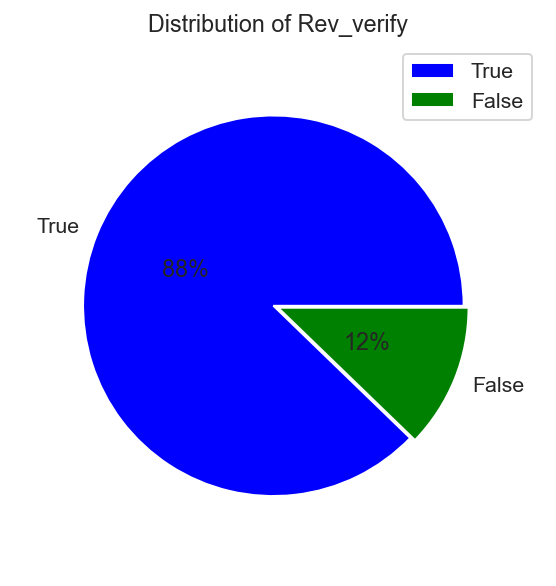

In [16]:
index=df['Rev_verify'].value_counts().index.tolist()
val=df['Rev_verify'].value_counts().values.tolist()
exp=(0.025,0)
clr=('blue','green')
plt.figure(figsize=(10,5),dpi=140)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=val,explode=exp,labels=index,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=False,radius=0.9)
plt.title('Distribution of Rev_verify')
plt.legend()
plt.show()

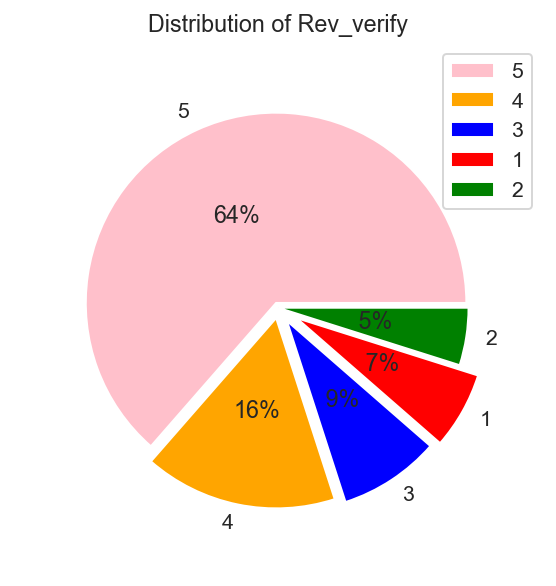

In [17]:
index=df['Rating'].value_counts().index.tolist()
val=df['Rating'].value_counts().values.tolist()
exp=(0.025,0.050,0.075,0.1,0)
clr=('pink','orange','blue','red','green')
plt.figure(figsize=(10,5),dpi=140)
sns.set_context('talk',font_scale=0.4)
sns.set(style='whitegrid')
plt.pie(x=val,explode=exp,labels=index,colors=clr,autopct='%2.0f%%',pctdistance=0.5, shadow=False,radius=0.9)
plt.title('Distribution of Rev_verify')
plt.legend()
plt.show()

In [18]:
df.reset_index(drop=True,inplace=True)
df.head()

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ
0,3,True,2013-02-27,B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall
1,5,True,2016-12-22,B00MAWPGMI,{'Color:': ' _Shimmery White'},hannahv_tc,"Love this case, very sturdy!",Five Stars
2,5,True,2015-06-22,B00NMR6N7W,"{'Color:': ' Clear', 'Package Type:': ' Standa...",Jacob,Great screen protector for the money! Paid $1....,Perfect!
3,5,True,2017-08-13,B018V60504,{'Color:': ' Black'},Metlman,"Nice charger. One problem, one if the two USB ...",Make sure your Items work before you miss the ...
4,5,False,2015-04-02,B00PG8TID6,"{'Color:': ' Black', 'Product Packaging:': ' S...",A. Burke,Most battery packs for iPhones come as a total...,This clever design combines a battery pack int...


In [19]:
remove_reviews = []
index=[]
for i in range(len(df)):
    reviews = str(df["Review"][i])  
    
    reviews=reviews.split()
    
    if len(reviews)<3:
        remove_reviews.append(df["Review"][i])
        index.append(i)

In [20]:
print('Length of unwanted reviews to be removed= ',len(remove_reviews))

Length of unwanted reviews to be removed=  49174


In [21]:
#visualizing reviews whose length are less than 3
sample=remove_reviews[225]
sample

'Good'

In [22]:
import random
sample=random.sample(index,10)
sample

[152824, 309341, 303190, 396829, 210156, 4536, 179669, 330640, 86101, 395143]

In [23]:
#checking the review using index based location method
df.iloc[sample[7]]

Rating                              5
Rev_verify                       True
Review_Date       2014-11-13 00:00:00
IC                         B00JU2X5VU
Prod_meta        {'Color:': ' Black'}
Reviewer_Name                 Luis N.
Review                 EXCELLENT SALE
Rev_summ                   Five Stars
Name: 330640, dtype: object

In [24]:
#dropping the values of rows where the length of review is less than 3
df.drop(data.index[index],inplace=True) 

In [25]:
print('New shape after removal of small words=', data.shape)

New shape after removal of small words= (760450, 11)


In [26]:
from nltk import FreqDist
def frequency(text,no):
    
    words = ' '.join([i for i in text])
    words=words.lower()
    words = words.split()
    distribution= FreqDist(words)  #checking repeation of words in a sentence
    df = pd.DataFrame({'word':list(distribution.keys()), 'count':list(distribution.values())})
    
    data = df.nlargest(columns="count", n = no) 
    
    plt.figure(figsize=(40,20),dpi=200)
    sns.set(context='notebook',style='whitegrid',palette='bright',font='monospace',font_scale=2)
    m=sns.barplot(x='word',y='count',data=data,orient='v',palette='prism',saturation=35)
    m.set_xticklabels(m.get_xticklabels(),rotation=90,weight='bold')
    for i in m.patches:
        m.annotate(format(i.get_height(),'.0f'),(i.get_x()+i.get_width()/2,i.get_height()),xytext=(1,1),ha='center',
                   weight='bold', rotation=70,va='center',textcoords='offset points')
    plt.xlabel('\nWORDS',fontsize=26,weight='bold')
    plt.ylabel('COUNT\n',fontsize=26,weight='bold')
    plt.title('PLOT TO SEE THE COUNT OF WORDS\n',fontsize=26,weight='bold')
    plt.show()

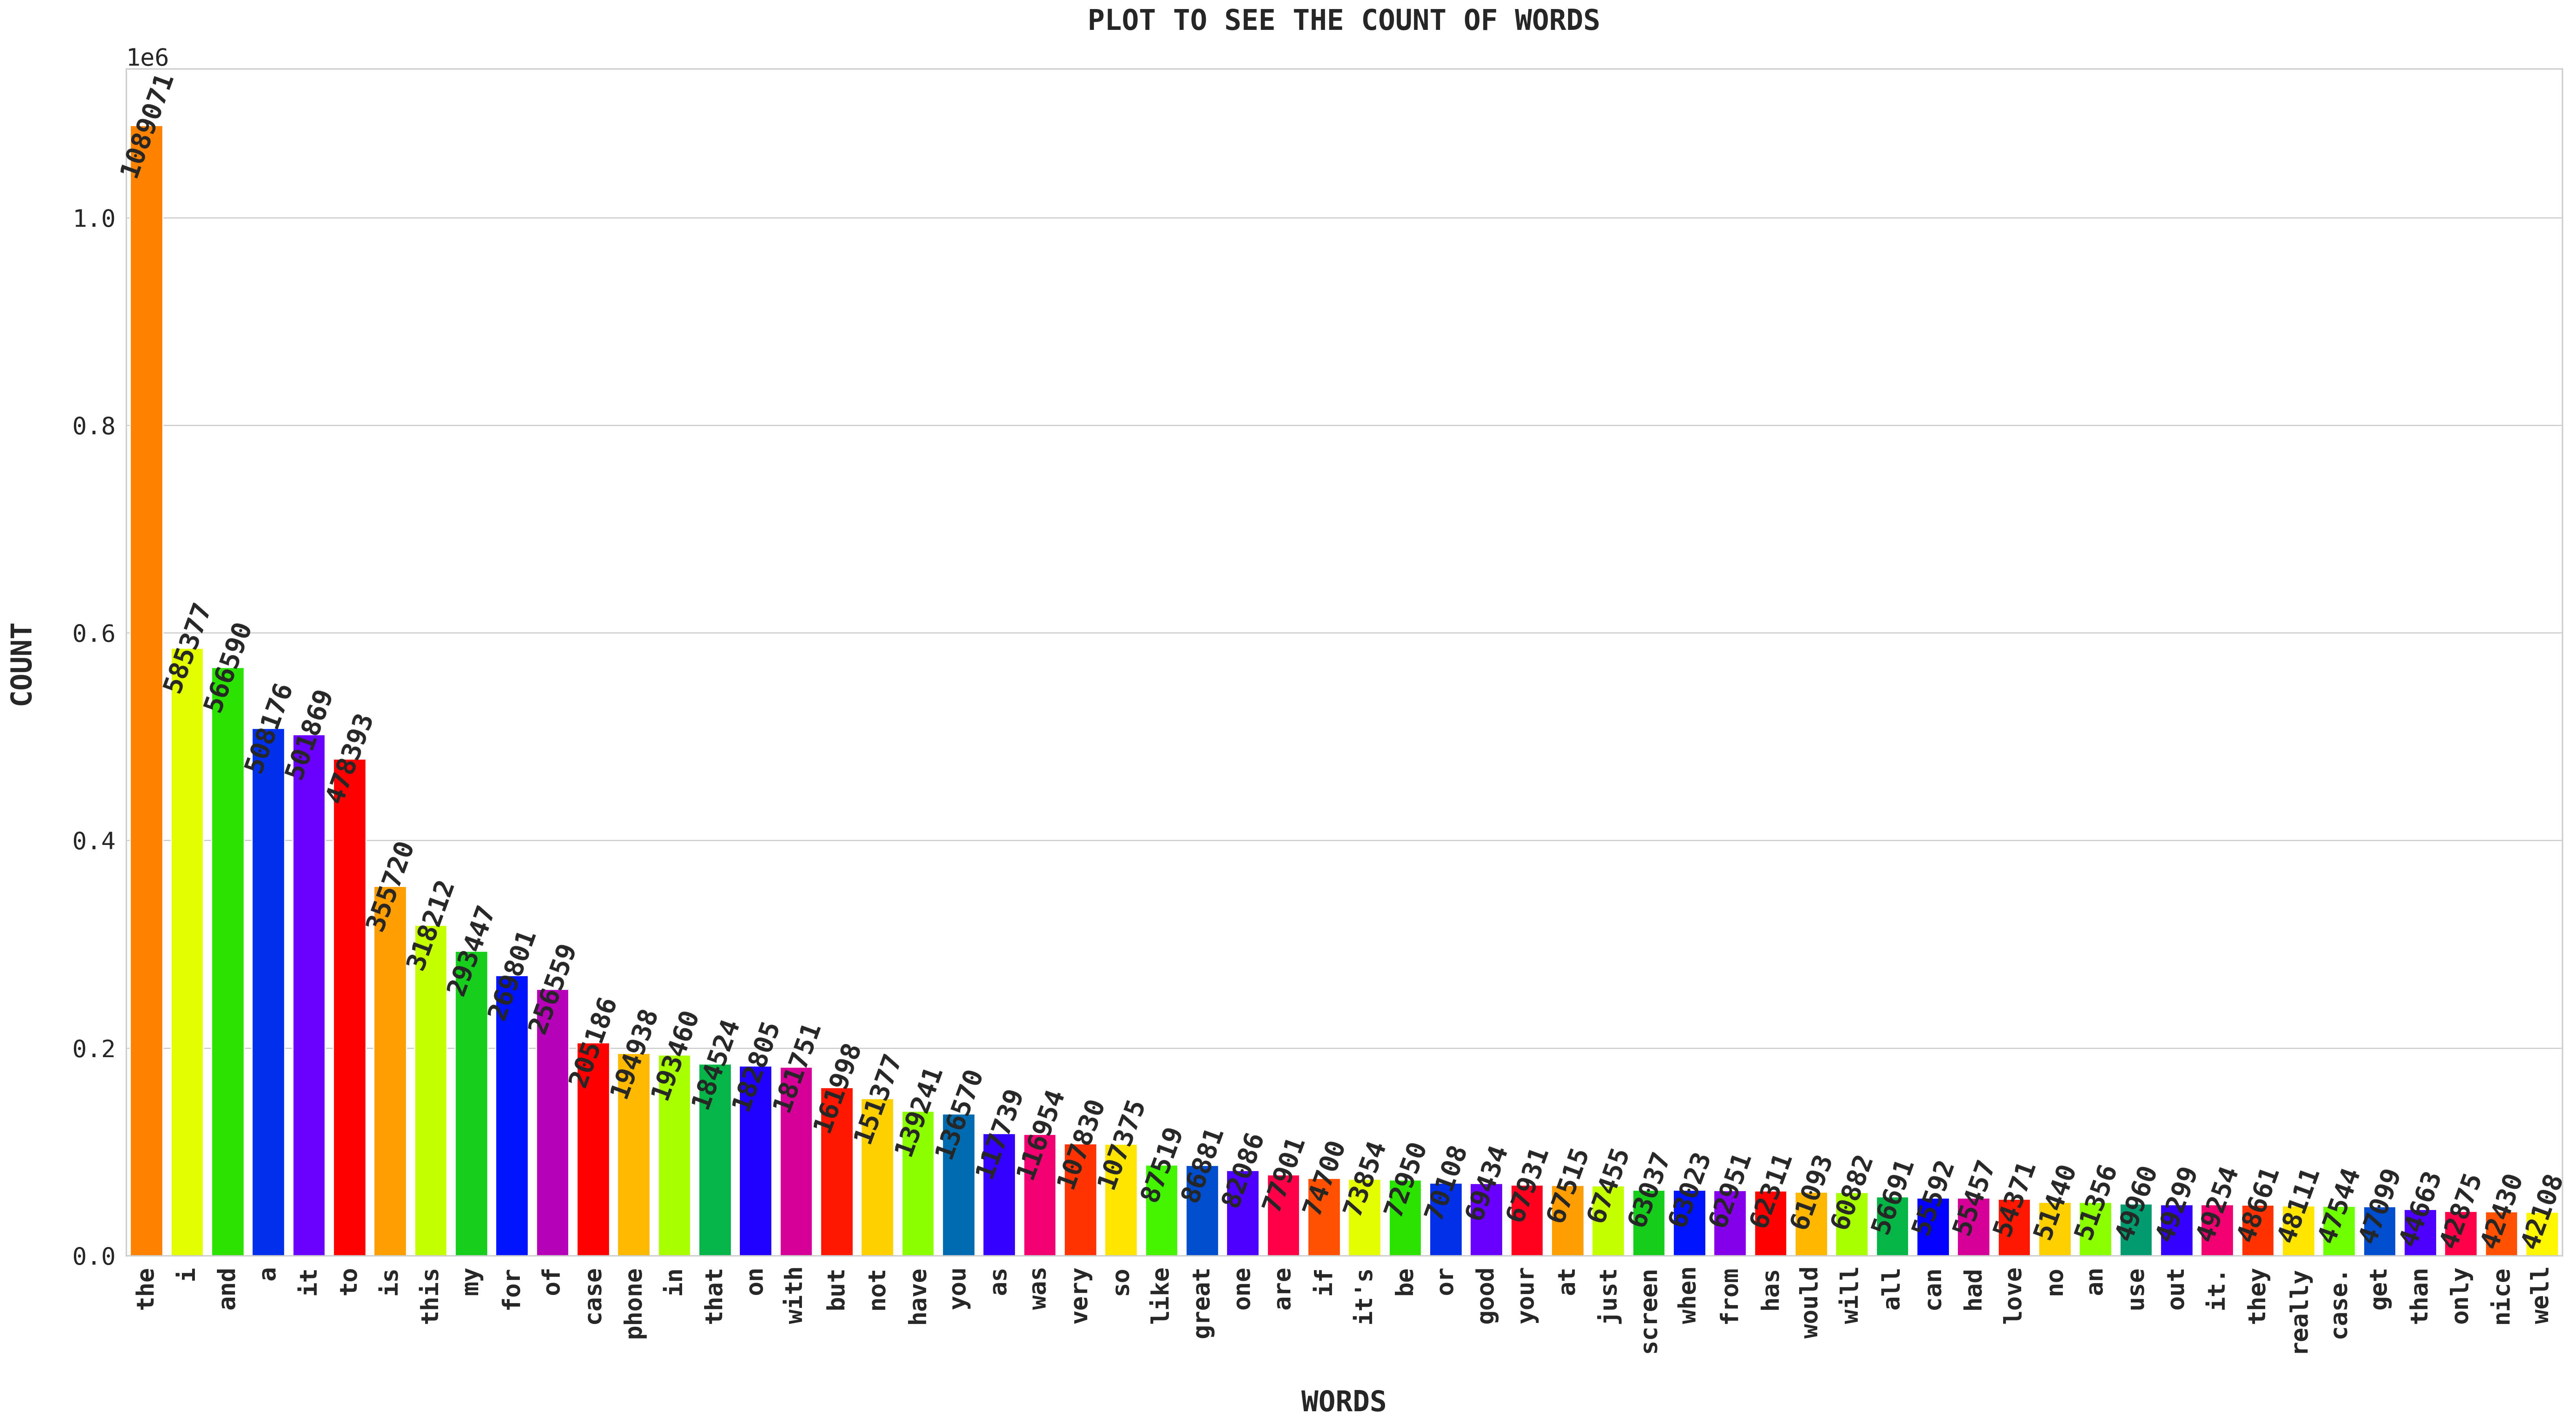

In [27]:
frequency(df['Review'],no=60)

In [28]:
#ADDING AN EXTRA COLUMN "Review_uncleaned" TO THE DATASET WHICH WILL SHOW THE LENGTH OF THE REVIEWS IN REVIEW COLUMN
df['Review_uncleaned']= df['Review'].str.len().astype('int64')

In [29]:
df.head(3)

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_uncleaned
0,3,True,2013-02-27,B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,109
1,5,True,2016-12-22,B00MAWPGMI,{'Color:': ' _Shimmery White'},hannahv_tc,"Love this case, very sturdy!",Five Stars,28
2,5,True,2015-06-22,B00NMR6N7W,"{'Color:': ' Clear', 'Package Type:': ' Standa...",Jacob,Great screen protector for the money! Paid $1....,Perfect!,347


In [30]:
#List of Stopwords
stopwords=['i','me','my','myself','we','our','ours','ourselves','you',"you're","you've","you'll","you'd",'href'
           'your','yours','yourself','yourselves','he','him','his','himself','she',"she's",'her','hers','link',
           'herself','it',"it's",'its','itself','they','them','their','theirs','themselves','what','which',
           'who','whom','this','that',"that'll",'these','how','these','those','am','is','are','was','were','used',
           'be','been','being','have','has','had','having','do','does','did','done','doing','a','an','the','hold',
           'and','but','if','or','because','as','until','while','of','at','by','for','with','about','against','know,'
           'between','into','through','during','before','after','above','below','to','from','up','down','in','out',
           'on','off','over','under','again','further','then','once','here','there','when','where','why','how','many',
           'all','any','both','each','few','more','most','other','some','such','no','nor','not','only','own','same',
           'so','than','too','very','s','t','can','will','just','don',"don't",'should',"should've",'now','d','ll','m',
           'o','re','ve','y','ain','aren',"aren't",'couldn',"couldn't",'didn',"didn't",'doesn',"doesn't",'hadn','many',
           "hadn't",'hasn',"hasn't",'haven',"haven't",'isn',"isn't",'mightn',"mightn't",'mustn',"mustn't",'needn',
           "needn't",'shan',"shan't",'shouldn',"shouldn't",'wasn',"wasn't",'weren',"weren't",'won',"won't",'wouldn','cant',
           "wouldn't","gregor","samsa", 'looked', "What's",'although','upright','bit','right','state',"i've",'much','more',
           "there's","You've",'got',"i'd",'everything','true','yes','moreover','would','could','like','mr.','but','couldnt'
           "i'm",'able','back','get','still','ought','perhaps','without','away','onto','ive','must','see','went','saw','havent'
           'many','whats','id','let','day','never','yet','im','go','thatll','theyre','came','youll','come','word','noone',
          "now!","then?","that's","than", 'is', 'more',  'so', 'on','can','all','as', 'a',"don't", "doesn't", "it's","I'm","that's","there's",
           "what's","where's","it's","who's","i'm","she's","he's","they're","who're","ain't","wouldn't","shouldn't","can't",
           "couldn't","won't","will",'didnt','really','used','using','month','received','hand','since','give','dont','well',
           'doesnt','also','feel','enough','want','keep','made','around','even','need','thing','another','seller','though',
          'cant','however','many']
print("Length of stopwords=",len(stopwords))

Length of stopwords= 305


In [42]:
def preprocess(text):
    processed=[]
    
    lower=str(text).lower().replace(r'\n'," ").replace(r'\s+', ' ').replace(r'\d+(\.\d+)?', '')
    #removing \n,large white space and leading_trailing white spaces and numbers by single white space
    
    lower=lower.replace(r'^.+@[^\.].*\.[a-z]{2,}$',' ') #replacing any mailids by whitespace
    punct=lower.translate(str.maketrans('', '', string.punctuation))  #remove punctuation
    digit=punct.translate(str.maketrans('', '', string.digits))       #remove digits any remaining
    word= word_tokenize(digit, "english")
    
    for i in word:
        if i not in stopwords and len(i)>3:   #considering token whose lenth
            lemma=WordNetLemmatizer().lemmatize(i)
            processed.append(lemma)
    return(" ".join([x for x in processed])).strip()

In [43]:
%%time
import string
processed_docs = []
for i in df.Review:
    processed_docs.append(preprocess(i))

Wall time: 4min 30s


In [44]:
#CREATING A DATAFRAME
processed= pd.DataFrame({'Cleaned REVIEW' : processed_docs })
df.head(3)

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_uncleaned,cleaned_review
0,3,True,2013-02-27,B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,109,NaN
1,5,True,2016-12-22,B00MAWPGMI,{'Color:': ' _Shimmery White'},hannahv_tc,"Love this case, very sturdy!",Five Stars,28,NaN
2,5,True,2015-06-22,B00NMR6N7W,"{'Color:': ' Clear', 'Package Type:': ' Standa...",Jacob,Great screen protector for the money! Paid $1....,Perfect!,347,NaN


In [45]:
processed.head(4)

,Cleaned REVIEW
0,material nice color neon green expected liked
1,love case sturdy
2,great screen protector money paid free shippin...
3,nice charger problem slot misaligned allowing ...


In [46]:
df['cleaned_review']=processed

In [47]:
df.head(3)

,Rating,Rev_verify,Review_Date,IC,Prod_meta,Reviewer_Name,Review,Rev_summ,Review_uncleaned,cleaned_review
0,3,True,2013-02-27,B0089CH3TM,{'Color:': ' Green'},Alyse,"The material and fit is very nice, but the col...",Good case overall,109,material nice color neon green expected liked
1,5,True,2016-12-22,B00MAWPGMI,{'Color:': ' _Shimmery White'},hannahv_tc,"Love this case, very sturdy!",Five Stars,28,love case sturdy
2,5,True,2015-06-22,B00NMR6N7W,"{'Color:': ' Clear', 'Package Type:': ' Standa...",Jacob,Great screen protector for the money! Paid $1....,Perfect!,347,great screen protector money paid free shippin...


In [48]:
df['Cleaned Review length']=df['cleaned_review'].str.len()

In [49]:
df.isnull().sum()

Rating                       0
Rev_verify                   0
Review_Date                  0
IC                           0
Prod_meta                    0
Reviewer_Name                0
Review                       0
Rev_summ                     0
Review_uncleaned             0
cleaned_review           43349
Cleaned Review length    43349
dtype: int64

In [50]:
#Drop null values  
df.dropna(inplace=True)

In [51]:
df['Cleaned Review length']=df['Cleaned Review length'].astype('int32')

In [53]:
#CALCULATING THE NUMBER OF TEXTS removed
print('Original Length = ', df['Review_uncleaned'].sum())
print('Clean Length =  ', df['Cleaned Review length'].sum())
print('Total Reduction = ',df['Review_uncleaned'].sum()-df['Cleaned Review length'].sum())

Original Length =  94233371
Clean Length =   48876450
Total Reduction =  45356921


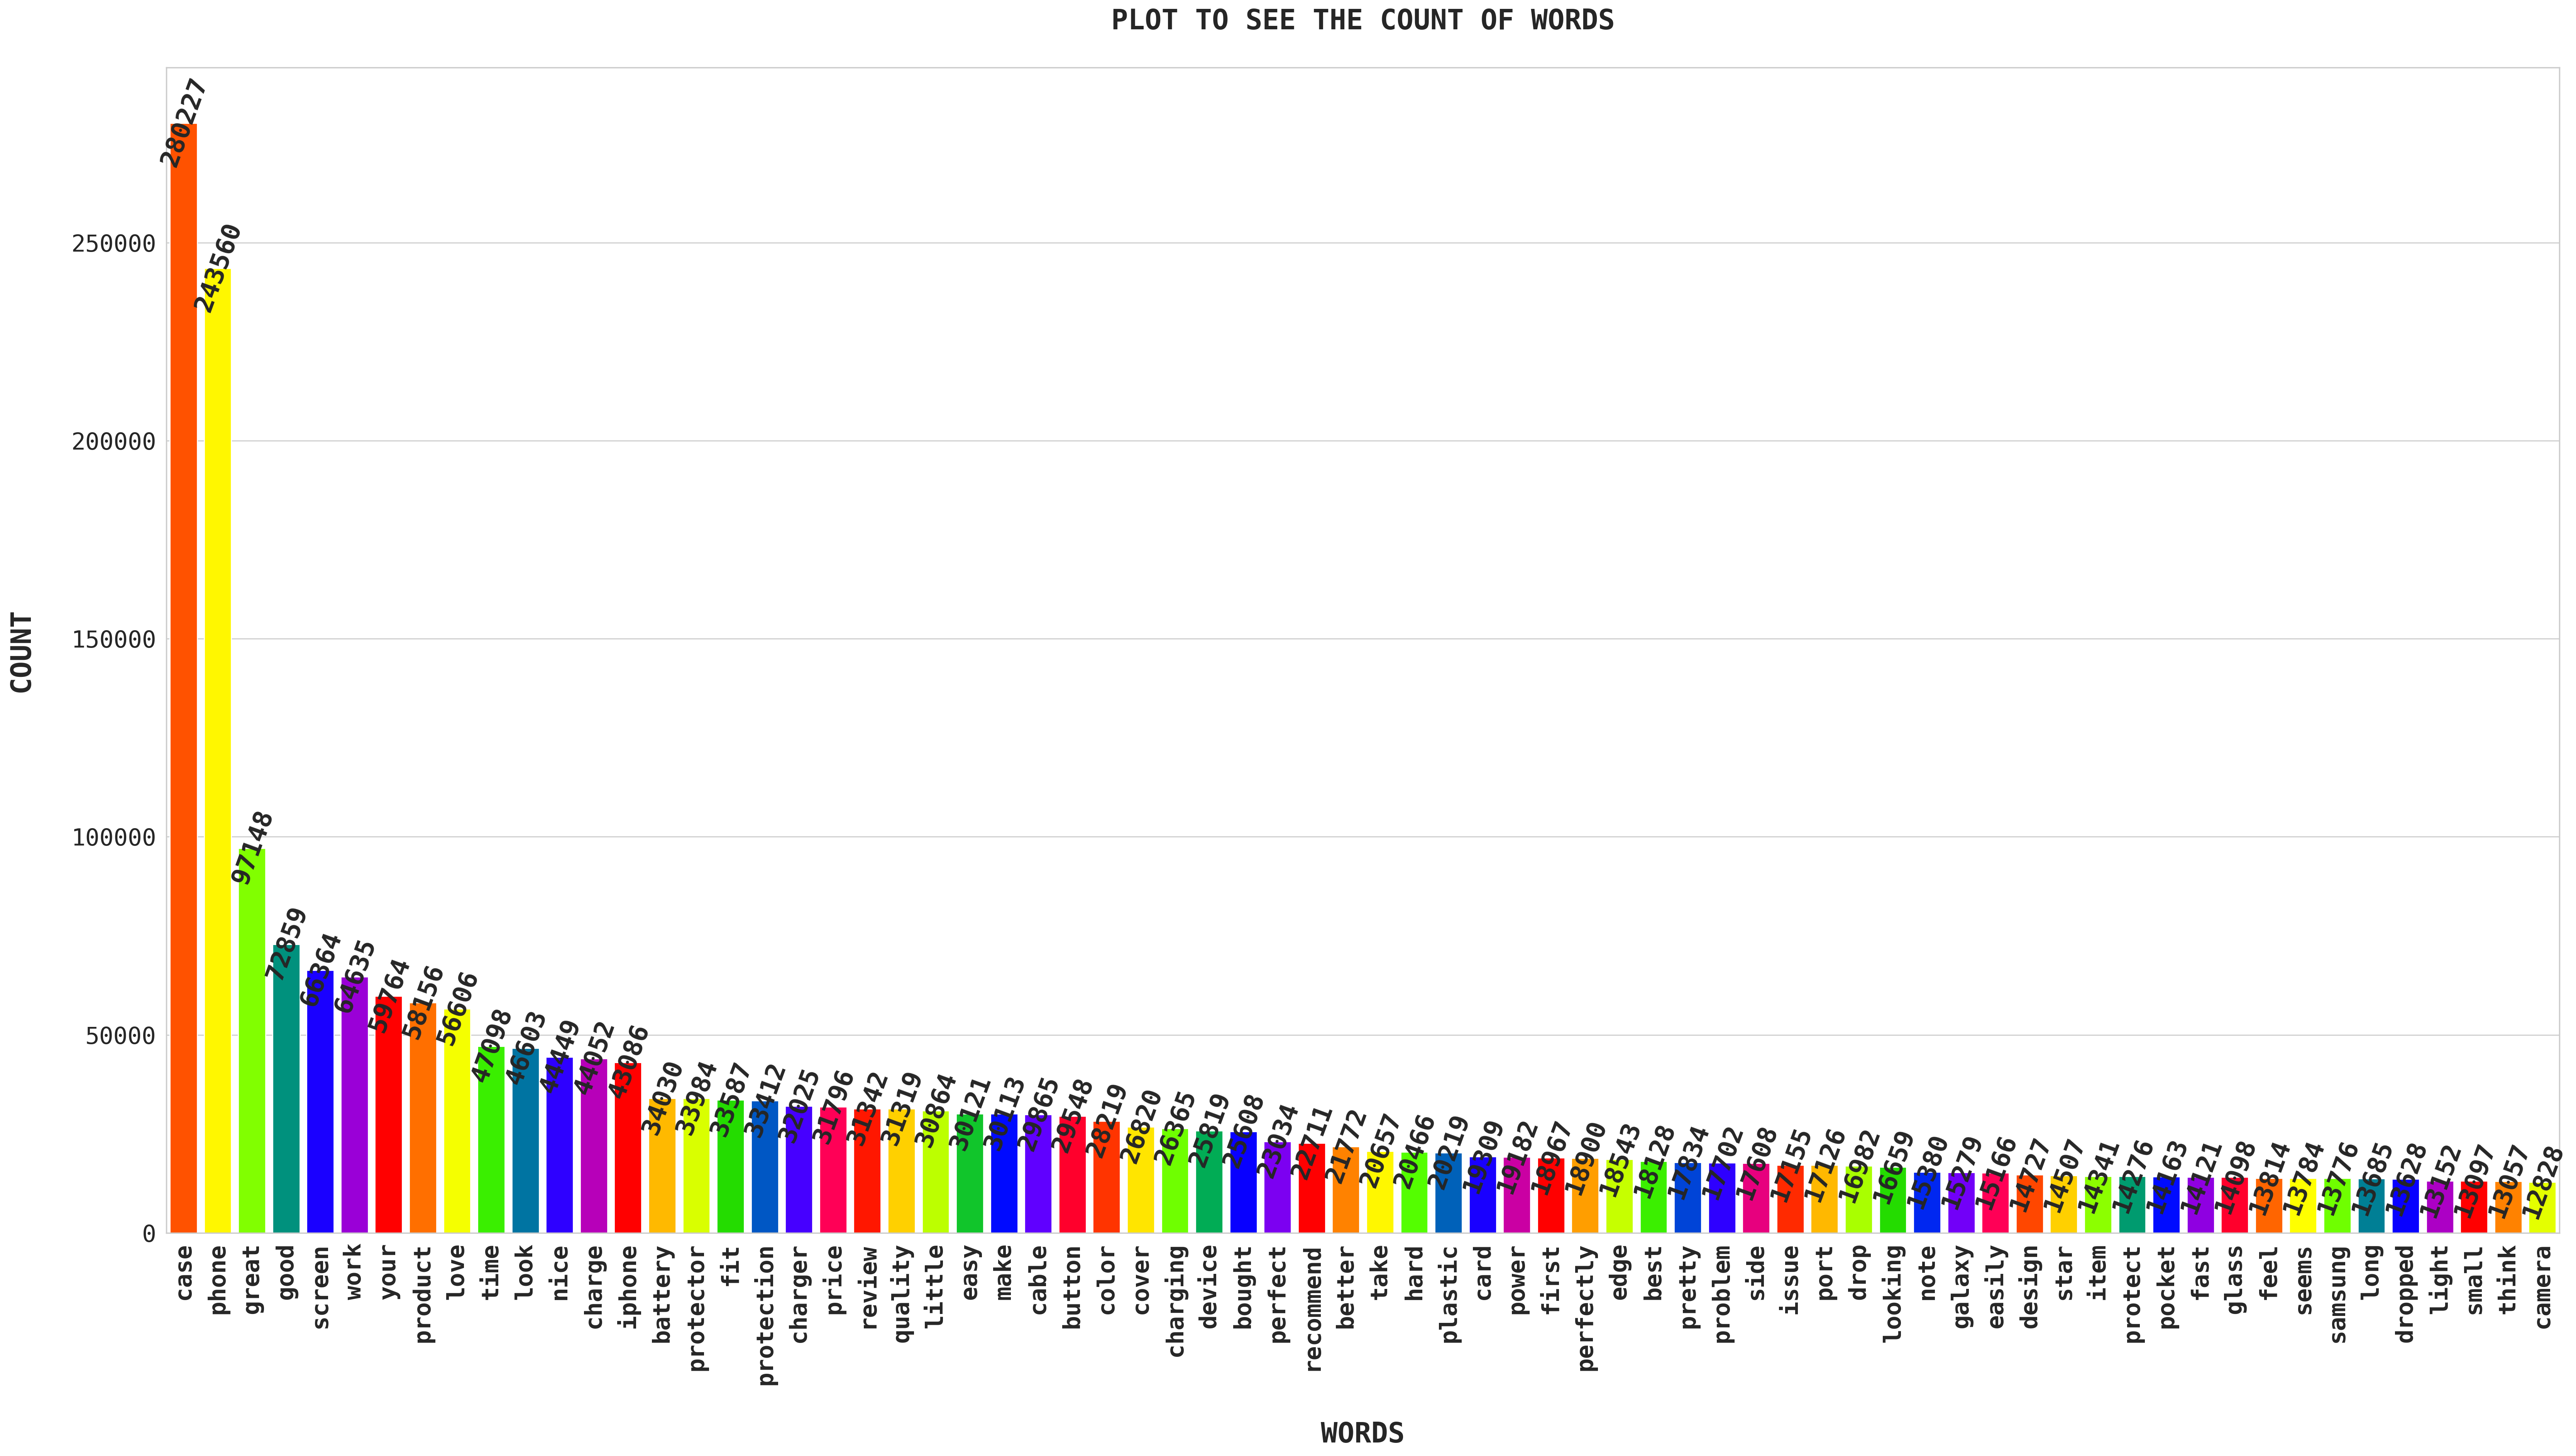

In [54]:
frequency(df['cleaned_review'],no=70)

In [55]:
ic=df["IC"].value_counts().index.tolist()
len(ic)

20859

In [56]:
%%time
dictionary={}
dictionary['IC']=[]
dictionary['REVIEW']=[]
dictionary['maximum']=[]
dictionary['average']=[]
dictionary['minimum']=[]

for x in ic:
    i=0
    j=0
    k=0
    comment=' '
    dictionary['IC'].append(x)
    #desc=product.loc[product['IC']==x,'Prod_meta'].values
    #dictionary['DESCRIPTION'].append(desc[0])
    review=df.loc[df['IC']==x,'cleaned_review']
    for rev in review:
        comment = comment + ' ' +  str(rev)
    dictionary['REVIEW'].append(comment)
    
    rates=df.loc[df['IC']==x,'Rating'].values
    for rate in rates:
        if rate>3:
            i=i+1
    
        elif rate==3:
            j=j+1
       
        else:
            k=k+1
            
    dictionary['maximum'].append(i)
    dictionary['average'].append(j)
    dictionary['minimum'].append(k)

Wall time: 19min 42s


In [57]:
print('NUMBER OF UNIQUE IC= ',len(dictionary['IC']),'\nNUMBER OF REVIEWS= ',len(dictionary['REVIEW']))

NUMBER OF UNIQUE IC=  20859 
NUMBER OF REVIEWS=  20859


In [58]:
print('NUMBER OF UNIQUE IC= ',len(dictionary['IC']),'\nNUMBER OF REVIEWS= ',len(dictionary['REVIEW']))

NUMBER OF UNIQUE IC=  20859 
NUMBER OF REVIEWS=  20859


In [59]:
df1=pd.DataFrame(dictionary)
df1.head()

,IC,REVIEW,maximum,average,minimum
0,B005NF5NTK,plastic hinge leaf rugged walker wanting bet...,780,44,51
1,B00VH88CJ0,protects phone especially frontglass screen ...,825,18,27
2,B019PV2I3G,great product work expected great product gr...,762,17,49
3,B018JW3EOY,bought birthday present friend love small wi...,763,19,24
4,B00X5RV14Y,moto wife friday ordered hulu case ended bum...,755,22,20


In [60]:
df1.shape

(20859, 5)

In [61]:
def preprocess(text):
    processed=[]
    text=text.lower().replace(r'\n'," ").replace(r'\s+', ' ').replace(r'\d+(\.\d+)?', '') 
     #removing \n,large white space and leading_trailing white spaces and numbers by single white space
           
    punct=text.translate(str.maketrans('', '', string.punctuation))  #remove punctuation
    digit=punct.translate(str.maketrans('', '', string.digits))      #remove digits
    word= word_tokenize(digit, "english")
    for i in word:
        if i not in stopwords and len(i)>=3:
            lemma=WordNetLemmatizer().lemmatize(i)
            processed.append(lemma)
    return processed

In [62]:
%%time
processed_docs = []
for i in df1.REVIEW:
    processed_docs.append(preprocess(i))

Wall time: 2min 17s


In [63]:
#creating a dictionary
import gensim
dictionary = gensim.corpora.Dictionary(processed_docs)
print (dictionary)

Dictionary(88414 unique tokens: ['ability', 'absolutely', 'absorbs', 'absorption', 'abuse']...)


In [64]:
#checking the first 30 key value pairs of the dictionary created
count=0
for k,v in dictionary.iteritems():
    print (k, v)
    count +=1
    if count >30:
        break

0 ability
1 absolutely
2 absorbs
3 absorption
4 abuse
5 abusive
6 abysmal
7 accent
8 accept
9 acceptable
10 access
11 accessible
12 accessory
13 accident
14 accidental
15 accidentally
16 accidently
17 accommodate
18 according
19 accordingly
20 account
21 accumulated
22 accurate
23 achievement
24 across
25 act
26 acting
27 activate
28 activated
29 activates
30 activation


In [65]:
#removing rare and repetitive words
dictionary.filter_extremes(no_below=3,no_above=0.02,keep_n=95000)

In [66]:
print (dictionary)

Dictionary(21754 unique tokens: ['absorbs', 'absorption', 'abusive', 'abysmal', 'accent']...)


In [67]:
bow_corpus = [dictionary.doc2bow(doc) for doc in processed_docs]
bow_corpus[3]

[(0, 1),
 (4, 2),
 (5, 1),
 (7, 1),
 (8, 1),
 (12, 1),
 (14, 1),
 (21, 1),
 (22, 1),
 (24, 1),
 (25, 2),
 (26, 1),
 (27, 2),
 (31, 1),
 (34, 2),
 (37, 1),
 (39, 2),
 (44, 1),
 (47, 1),
 (49, 3),
 (53, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (59, 2),
 (68, 1),
 (69, 1),
 (77, 2),
 (83, 1),
 (85, 2),
 (92, 1),
 (97, 2),
 (99, 1),
 (100, 1),
 (101, 1),
 (125, 1),
 (130, 1),
 (134, 1),
 (137, 1),
 (141, 2),
 (143, 1),
 (144, 1),
 (145, 1),
 (146, 1),
 (151, 1),
 (153, 1),
 (162, 1),
 (164, 1),
 (165, 2),
 (173, 1),
 (175, 3),
 (176, 1),
 (180, 1),
 (181, 1),
 (182, 1),
 (185, 1),
 (187, 1),
 (192, 1),
 (203, 1),
 (206, 1),
 (207, 1),
 (210, 1),
 (212, 1),
 (213, 1),
 (215, 1),
 (219, 1),
 (223, 1),
 (224, 1),
 (228, 2),
 (231, 3),
 (233, 1),
 (248, 1),
 (265, 1),
 (268, 1),
 (270, 3),
 (272, 2),
 (280, 1),
 (281, 1),
 (284, 3),
 (286, 1),
 (292, 1),
 (293, 2),
 (294, 1),
 (297, 2),
 (298, 1),
 (300, 1),
 (303, 1),
 (309, 1),
 (310, 1),
 (312, 2),
 (313, 1),
 (318, 1),
 (319, 1),
 (321, 3),
 (32

LDA Model

In [69]:
lda_model =  gensim.models.LdaMulticore(bow_corpus, 
                                   num_topics = 50, 
                                   id2word = dictionary,                                    
                                   passes =10)

In [70]:
def dominant_topic(ldamodel, corpus, texts):
#Function to find the dominant topic in each review
    sent_topics_df = pd.DataFrame() 
# Get main topic in each review
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
# Get the Dominant topic, Perc Contribution and Keywords for each review
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:# =&gt; dominant topic
                wp = ldamodel.show_topic(topic_num,topn=30)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Topic', 'Perc_Contri', 'Keywords']
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [72]:
dominant = dominant_topic(ldamodel=lda_model, corpus=bow_corpus, texts=df1['REVIEW']) 
dominant.head()

,Topic,Perc_Contri,Keywords,REVIEW
0,34.0,0.3663,"asus, zenfone, latch, reality, virtual, core, ...",plastic hinge leaf rugged walker wanting bet...
1,43.0,0.1275,"typec, macbook, chromebook, command, voltage, ...",protects phone especially frontglass screen ...
2,34.0,0.2003,"asus, zenfone, latch, reality, virtual, core, ...",great product work expected great product gr...
3,34.0,0.4333,"asus, zenfone, latch, reality, virtual, core, ...",bought birthday present friend love small wi...
4,34.0,0.2783,"asus, zenfone, latch, reality, virtual, core, ...",moto wife friday ordered hulu case ended bum...


In [76]:
xyz=dominant.drop(['REVIEW'],axis=1)
xyz.head()

,Topic,Perc_Contri,Keywords
0,34.0,0.3663,"asus, zenfone, latch, reality, virtual, core, ..."
1,43.0,0.1275,"typec, macbook, chromebook, command, voltage, ..."
2,34.0,0.2003,"asus, zenfone, latch, reality, virtual, core, ..."
3,34.0,0.4333,"asus, zenfone, latch, reality, virtual, core, ..."
4,34.0,0.2783,"asus, zenfone, latch, reality, virtual, core, ..."


In [78]:
final=pd.concat([df1,xyz],axis=1)
final.head()

,IC,REVIEW,maximum,average,minimum,Topic,Perc_Contri,Keywords
0,B005NF5NTK,plastic hinge leaf rugged walker wanting bet...,780,44,51,34.0,0.3663,"asus, zenfone, latch, reality, virtual, core, ..."
1,B00VH88CJ0,protects phone especially frontglass screen ...,825,18,27,43.0,0.1275,"typec, macbook, chromebook, command, voltage, ..."
2,B019PV2I3G,great product work expected great product gr...,762,17,49,34.0,0.2003,"asus, zenfone, latch, reality, virtual, core, ..."
3,B018JW3EOY,bought birthday present friend love small wi...,763,19,24,34.0,0.4333,"asus, zenfone, latch, reality, virtual, core, ..."
4,B00X5RV14Y,moto wife friday ordered hulu case ended bum...,755,22,20,34.0,0.2783,"asus, zenfone, latch, reality, virtual, core, ..."


In [79]:
final.shape

(20859, 8)

In [85]:
#Saving LDA model as final model
joblib.dump(lda_model,'Prod_Rev.pkl')

['Prod_Rev.pkl']

In [86]:
#Export final Dataframe to JSON file
final.to_json(r'E:\FlipRobo\NLP\Product Review Summerization\product.json')